In [210]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.preprocessing import MinMaxScaler

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/diamonds/diamonds.csv


In [211]:
# Load data
diamonds = pd.read_csv('/kaggle/input/diamonds/diamonds.csv', index_col=0)
# In ra 5 dòng đầu tiên của tập dữ liệu
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [212]:
# Kiểm tra thông tin của tập dữ liệu
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53940 entries, 1 to 53940
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


In [213]:
# Kiểm tra xem có giá trị null không
diamonds.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [214]:
# Thông tin số lượng hàng và cột của tập dữ liệu
diamonds.shape

(53940, 10)

In [215]:
# Kiểm tra xem có giá trị trùng lặp không
diamonds.duplicated().sum()

146

In [216]:
# Xóa các dòng trùng lặp
diamonds = diamonds.drop_duplicates()

In [217]:
# Kiểm tra lại xem có giá trị trùng lặp không
diamonds.duplicated().sum()

0

In [218]:
# Xem số liệu của tập dữ liệu
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53794.00000,53794.000000,53794.000000,53794.000000,53794.000000,53794.000000,53794.000000
mean,0.79778,61.748080,57.458109,3933.065082,5.731214,5.734653,3.538714
std,0.47339,1.429909,2.233679,3988.114460,1.120695,1.141209,0.705037
min,0.20000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.40000,61.000000,56.000000,951.000000,4.710000,4.720000,2.910000
50%,0.70000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.04000,62.500000,59.000000,5326.750000,6.540000,6.540000,4.030000
max,5.01000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [219]:
#Dropping dimentionless diamonds
diamonds = diamonds.drop(diamonds[diamonds["x"]==0].index)
diamonds = diamonds.drop(diamonds[diamonds["y"]==0].index)
diamonds = diamonds.drop(diamonds[diamonds["z"]==0].index)
diamonds.shape

(53775, 10)

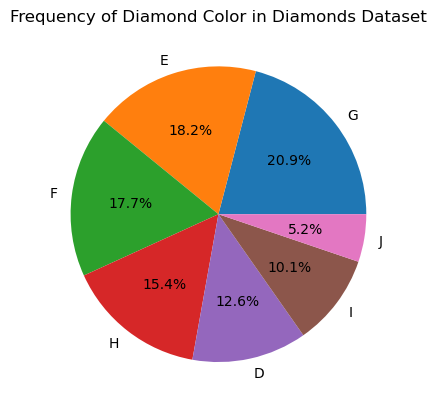

In [220]:
# Biểu đồ thể hiện tần suất của thuộc tính Color trong tập dữ liệu
diamond_color_counts = diamonds['color'].value_counts()

plt.pie(diamond_color_counts.values, labels=diamond_color_counts.index, autopct='%1.1f%%')
plt.title('Frequency of Diamond Color in Diamonds Dataset')
plt.show()

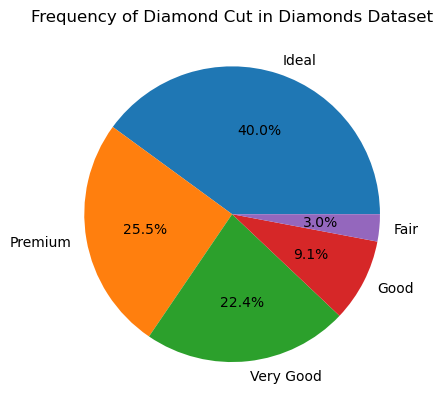

In [221]:
# Biểu đồ thể hiện tần suất của thuộc tính Cut trong tập dữ liệu
diamond_cut_counts = diamonds['cut'].value_counts()

plt.pie(diamond_cut_counts.values, labels=diamond_cut_counts.index, autopct='%1.1f%%')
plt.title('Frequency of Diamond Cut in Diamonds Dataset')
plt.show()

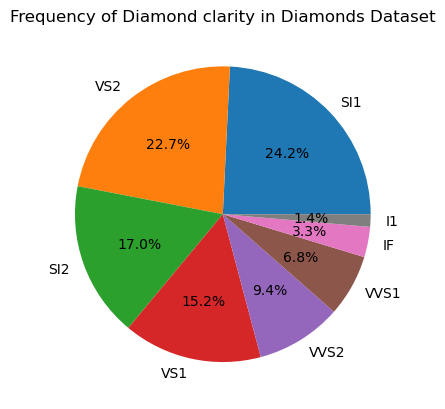

In [222]:
# Biểu đồ thể hiện tần suất của Thuộc tính Clarity trong tập dữ liệu
import matplotlib.pyplot as plt

diamond_clarity_counts = diamonds['clarity'].value_counts()

plt.pie(diamond_clarity_counts.values, labels=diamond_clarity_counts.index, autopct='%1.1f%%')
plt.title('Frequency of Diamond clarity in Diamonds Dataset')
plt.show()

In [223]:
#Mã hóa dữ liệu sang số
diamonds['cut'].replace({'Fair': 1, 'Good': 2, 'Very Good': 3, 'Premium': 4, 'Ideal': 5}, inplace=True)
diamonds['color'].replace({'D': 7, 'E': 6, 'F': 5, 'G': 4, 'H': 3, 'I': 2, 'J': 1}, inplace=True)
diamonds['clarity'].replace({'I1': 1, 'SI1': 2, 'SI2': 3, 'VS1': 4, 'VS2': 5, 'VVS1': 6, 'VVS2': 7, 'IF': 8}, inplace=True)

In [224]:
# Xem số liệu của tập dữ liệu sau khi mã hóa
diamonds.describe()

,carat,cut,color,clarity,depth,table,price,x,y,z
count,53775.000000,53775.000000,53775.000000,53775.000000,53775.000000,53775.000000,53775.000000,53775.000000,53775.000000,53775.000000
mean,0.797536,3.904231,4.406267,4.081971,61.748232,57.457806,3931.220288,5.731579,5.734909,3.539964
std,0.473169,1.116097,1.701271,1.769591,1.429639,2.233257,3985.918716,1.118611,1.139451,0.702017
min,0.200000,1.000000,1.000000,1.000000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,3.000000,3.000000,2.000000,61.000000,56.000000,951.000000,4.710000,4.720000,2.910000
50%,0.700000,4.000000,4.000000,4.000000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,5.000000,6.000000,5.000000,62.500000,59.000000,5324.000000,6.540000,6.540000,4.030000
max,5.010000,5.000000,7.000000,8.000000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [225]:
# Chuẩn bị dữ liệu
X = diamonds.drop('price', axis=1)
Y = diamonds['price']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [226]:
# Tiêu chuẩn hóa tập huấn luyện
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [227]:
# Tạo mô hình SVM và huấn luyện trên tập huấn luyện
model_svm = svm.SVR(kernel='linear')
model_svm.fit(X_train, Y_train)

SVR(kernel='linear')

In [228]:
# Tiêu chuẩn hóa tập kiểm tra và dự đoán kết quả
X_test = scaler.transform(X_test)
Y_pred = model_svm.predict(X_test)

In [229]:
# Đánh giá mô hình
accuracy = model_svm.score(X_test, Y_test)
print("Accuracy:", accuracy)

Accuracy: 0.8518221059048354


In [230]:
# Chọn các thuộc tính đầu vào và đầu ra
X = diamonds.drop('price', axis=1)
Y = diamonds['price']

In [238]:
# Chuẩn hóa dữ liệu của kim cương cần dự đoán
new_diamonds = pd.DataFrame([[3.5, 2.0, 3.0, 3.0, 79.0, 43, 4.0, 4.72, 2.9]])
new_diamonds = scaler.transform(new_diamonds)

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


In [239]:
# Dự đoán giá trị của kim cương
price = model_svm.predict(new_diamonds)
print("Predicted price:", price)

Predicted price: [20834.6132448]
